In this assignment the company wants to improve their delivery prediction time.
I'm developing a machine learning model to predict delivery time based on historical data.

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Load dataset
eats = pd.read_csv("uber_eats.csv")
print(eats)

# Data Cleaning
print("Duplicates:", eats.duplicated().sum())
uber_eats = eats.dropna()
print(uber_eats.isnull().sum())

     Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0         522         7.93   Windy           Low   Afternoon      Scooter   
1         738        16.42   Clear        Medium     Evening         Bike   
2         741         9.52   Foggy           Low       Night      Scooter   
3         661         7.44   Rainy        Medium   Afternoon      Scooter   
4         412        19.03   Clear           Low     Morning         Bike   
..        ...          ...     ...           ...         ...          ...   
995       107         8.50   Clear          High     Evening          Car   
996       271        16.28   Rainy           Low     Morning      Scooter   
997       861        15.62   Snowy          High     Evening      Scooter   
998       436        14.17   Clear           Low   Afternoon         Bike   
999       103         6.63   Foggy           Low       Night      Scooter   

     Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0   

Splitting the data to perfom an unbaised evaluation

In [49]:

# Splitting data
X = uber_eats[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']]
y = uber_eats['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Perform feature standardization

In [50]:

# Feature Standardization
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Train the model using Linear Regression

In [51]:
# Training model
model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

Evaluate the perfomance of our model

In [53]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

r2_score_r = r2_score(y_test, y_pred)
print('R2 Score:', r2_score_r)

mean_AE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mean_AE)

rmse = np.sqrt(mse)
print('Root Mean Square Error:', rmse)

Mean Squared Error (MSE): 94.25649655304069
R2 Score: 0.7693862329600764
Mean Absolute Error: 7.122451621481122
Root Mean Square Error: 9.708578503212543


The MSE is 94 minutes^2. The R^2 score is 77%. Mean Absolute error is 7 minutes away from delivery time. RMSE is off by 9.7 minutes.

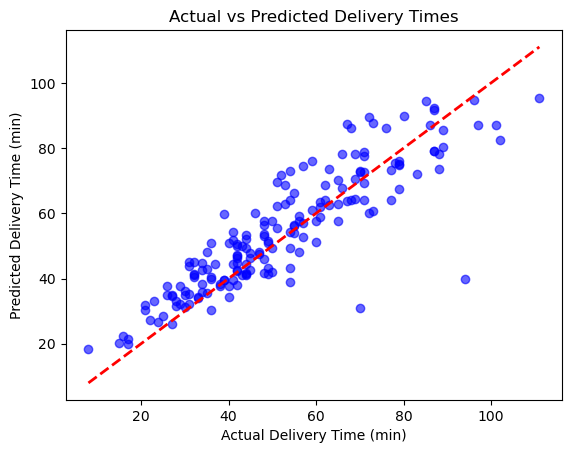

In [54]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.title("Actual vs Predicted Delivery Times")
plt.show()

This plot shows the actual delivery time plotted against the predicted delivery time. The plots close to the prediction line indicating that there is accuracy and the model is able to predict values around delivery time.

Using a Random forest Regressor that included the categorical data as well

In [55]:
eats_encoded = pd.get_dummies(eats, columns=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], drop_first=True)
print(eats_encoded)

     Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
0         522         7.93                    12                     1.0   
1         738        16.42                    20                     2.0   
2         741         9.52                    28                     1.0   
3         661         7.44                     5                     1.0   
4         412        19.03                    16                     5.0   
..        ...          ...                   ...                     ...   
995       107         8.50                    13                     3.0   
996       271        16.28                     8                     9.0   
997       861        15.62                    26                     2.0   
998       436        14.17                     8                     0.0   
999       103         6.63                    24                     3.0   

     Delivery_Time_min  Weather_Foggy  Weather_Rainy  Weather_Snowy  \
0               

In [56]:
eats_ = eats_encoded.dropna()
print(eats_.isnull().sum())

Order_ID                  0
Distance_km               0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
Weather_Foggy             0
Weather_Rainy             0
Weather_Snowy             0
Weather_Windy             0
Traffic_Level_Low         0
Traffic_Level_Medium      0
Time_of_Day_Evening       0
Time_of_Day_Morning       0
Time_of_Day_Night         0
Vehicle_Type_Car          0
Vehicle_Type_Scooter      0
dtype: int64


In [57]:
from sklearn.ensemble import RandomForestRegressor

# Splitting the data
X1 = eats_.drop("Delivery_Time_min", axis=1)
y1 = eats_["Delivery_Time_min"]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Training the Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)
y_pred_ = rf.predict(X_test_rf)

# Evaluation
mse = mean_squared_error(y_test_rf, y_pred_)
print('Mean Squared Error (MSE):', mse)

r2_score_r = r2_score(y_test_rf, y_pred_)
print('R2 Score:', r2_score_r)

mean_AE = mean_absolute_error(y_test_rf, y_pred_)
print('Mean Absolute Error:', mean_AE)

rmse = np.sqrt(mse)
print('Root Mean Square Error:', rmse)

Mean Squared Error (MSE): 113.17543350515463
R2 Score: 0.7753827607834949
Mean Absolute Error: 7.4236597938144335
Root Mean Square Error: 10.638394310475366


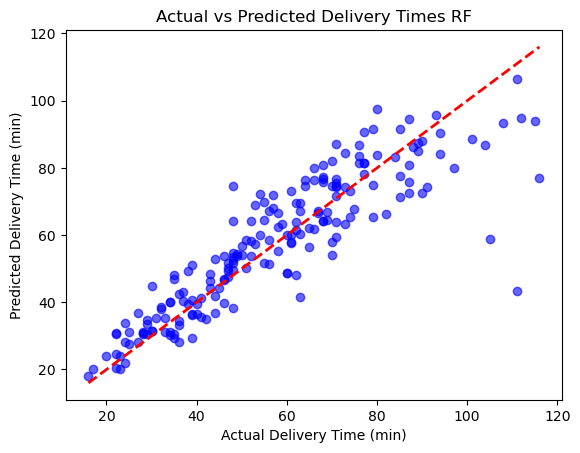

In [58]:

plt.scatter(y_test_rf, y_pred_, color="blue", alpha=0.6)
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], "r--", lw=2)
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.title("Actual vs Predicted Delivery Times RF")
plt.show()

It seems that the Linear Regression model performed better than the Random forest model. 